<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI3_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PADAWAN: JOSE ARMANDO ALVARADO RUIZ

# **FUNDAMENTOS DE ESTADÍSTICA**
**Entrega: M2_AI3_PREDICCIÓN_VENTAS**


#**Descripción de la tarea:**


Una empresa os ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017.

Necesitáis realizar las siguientes tareas:

- Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.
- ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?
- Evaluar el modelo a través de la SCE y el coeficiente de determinación.

Comenta y justifica todos los resultados obtenidos en cada apartado.

# Carga y análisis de la Data

IMPORTACIÓN DE LIBRERÍAS

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
import pandas.util.testing as tm
%matplotlib inline

Carga de Datos y visualización general

In [39]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.

In [40]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


In [41]:
# estructura de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [42]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,Fecha_anual,Inversion,Ventas
count,38.000000,38.000000,38.000000
mean,1998.500000,10.250000,10.492895
std,11.113055,5.556528,4.315321
min,1980.000000,1.000000,0.620000
25%,1989.250000,5.625000,7.565000
50%,1998.500000,10.250000,11.080000
75%,2007.750000,14.875000,14.032500
max,2017.000000,19.500000,17.450000


In [43]:
# Calculo la mediana
print("La mediana de la variable Inversion es:", df["Inversion"].median())
print("La mediana de la variable Ventas es:", df["Ventas"].median())

#Calculo la/s moda/s
print("La/s moda/s de la variable Inversion es/son:", df["Inversion"].mode().to_numpy())
print("La/s moda/s la variable Ventas es/son:", df["Ventas"].mode().to_numpy())


La mediana de la variable Inversion es: 10.25
La mediana de la variable Ventas es: 11.079999999999998
La/s moda/s de la variable Inversion es/son: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
La/s moda/s la variable Ventas es/son: [ 0.62  0.64  4.61  5.09  5.18  5.44  6.39  7.04  7.13  7.48  7.82  8.01
  8.22  8.86  9.1   9.78  9.82 10.05 11.04 11.12 11.44 11.47 12.01 12.33
 12.53 12.56 13.4  13.83 14.1  14.64 14.95 15.04 15.06 15.69 15.86 16.21
 16.72 17.45]


El dataset consta de **38 registros** con **3 variables**. No hay ningún missing para ninguna de las 3 variables, por lo que no hay problemas de calidad de datos con respecto a este punto.


**Análisis de variables:**


- fecha_anual: Corresponde al período anual de analisis. Variable del tipo Cualitativa del tipo ordinal y en función del análisis de datos como Categórica.

- Inversion: Monto total asociado a inversión en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.

- Ventas: Monto total asociado a ventas expresado en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.



**Medidas de Centralización:**

Con respecto a las variables de interes para este trabajo podemos observar:

- En la variable Inversión la media aritmetica es de 10.25 millones de euros, con un minimo de 1 millon de euros y un máximo de 19.5 millones de euros, siendo su rango de 18.5 millones de euros. La mediana es identica que la media aritmetica.

- En Ventas la media aritmetica es 10.492 millones de euros, con un mínimo de 0.62 millones de euros y un máximo de 17.45 millones de euros, siendo su rango de 16,83 millones de euros. La mediana es de 11.0799 millones de euros y es superior a la media aritmetica.

Con respecto a la moda en ambas variables no hay, ya que todas las puntuaciones de cada variable tienen la misma frecuencia.

# Representación Gráfica


El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.



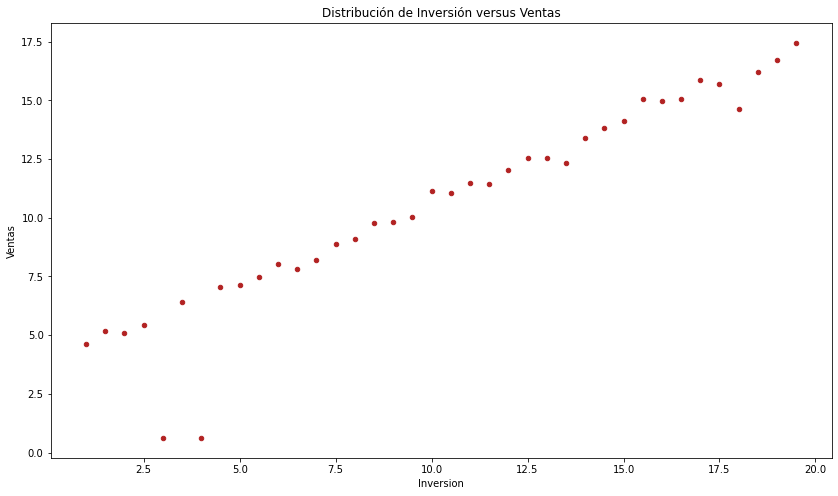

In [44]:
# Gráfico  de dispersión 
# ==============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

df.plot(
    x    = 'Inversion',
    y    = 'Ventas',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Inversión versus Ventas');

Se observa cómo hay una línea recta "imaginaria" que pasa por las observaciones en la gráfica de dispersión. Esto hace que parezca que se trata de una recta de regresión lineal. 

Además se ven dos valores que estan fuera de esta linea "imaginaria", que pueden representar valores outlier, los cuales se analizarán a continuación. 

# **Valores Atípicos**

Siempre es conveniente identificar si hay algún posible outlier, ya que podría estar condicionando en gran medida el modelo. La eliminación de este tipo de observaciones debe de analizarse con detalle y dependiendo de la finalidad del modelo. Si el fin es predictivo, un modelo sin outliers ni observaciones altamente influyentes suele ser capaz de predecir mejor la mayoría de casos. Sin embargo, es muy importante prestar atención a estos valores ya que, de no tratarse de errores de medida, pueden ser los casos más interesantes. El modo adecuado de proceder cuando se sospecha de algún posible valor atípico o influyente es calcular el modelo de regresión incluyendo y excluyendo dicho valor.

Analicemos ambas variables para determinar sus valores atípicos:

In [45]:
print("Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Ventas")
Q1_ventas = df["Ventas"].quantile(0.25)
Q3_ventas = df["Ventas"].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas

print("Primer cuartil:", Q1_ventas)
print("Tercer cuartil:", Q3_ventas)
print("Rango intercuartílico:",IQR_ventas)

print("\n\nCalculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Inversion")
Q1_inversion = df["Inversion"].quantile(0.25)
Q3_inversion = df["Inversion"].quantile(0.75)
IQR_inversion = Q3_inversion - Q1_inversion

print("Primer cuartil:", Q1_inversion)
print("Tercer cuartil:", Q3_inversion)
print("Rango intercuartílico:",IQR_inversion)

Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Ventas
Primer cuartil: 7.565
Tercer cuartil: 14.032499999999999
Rango intercuartílico: 6.4674999999999985


Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Inversion
Primer cuartil: 5.625
Tercer cuartil: 14.875
Rango intercuartílico: 9.25


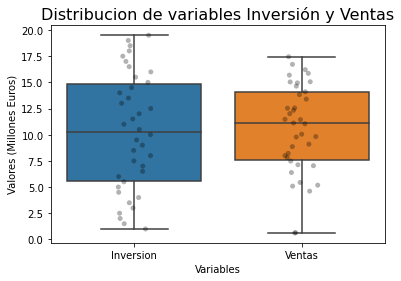

In [46]:
df2 = pd.DataFrame(data=df, columns=["Inversion", "Ventas"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df2), marker="o", alpha=0.3, color="black", order=["Inversion", "Ventas"])
boxplot.axes.set_title("Distribucion de variables Inversión y Ventas", fontsize=16)
boxplot.set_xlabel("Variables", fontsize=10)
boxplot.set_ylabel("Valores (Millones Euros)", fontsize=10)
plt.show()


Por outliers entendemos valores superiores a la suma del tercer cuartil más 1.5 veces el IQR, o inferiores al primer cuartil menos 1.5 veces el IQR.




In [47]:
outlier_sup_inversion = Q3_inversion + (IQR_inversion*1.5)
print(df[df["Inversion"] > outlier_sup_inversion])

outlier_min_inversion = Q1_inversion - (IQR_inversion*1.5)
print(df[df["Inversion"] < outlier_min_inversion])

outlier_sup_ventas = Q3_ventas + (IQR_ventas*1.5)
print(df[df["Ventas"] > outlier_sup_ventas])

outlier_min_ventas = Q1_ventas - (IQR_ventas*1.5)
print(df[df["Ventas"] < outlier_min_ventas])

Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []


Podemos distinguir que no existen valores atipicos dentro de la muestra, lo cual se visualiza en los boxplot de esta sección y se ratifica con el analisis del IQR*1.5.

# Análisis entre variables Inversión y Ventas

In [48]:
covarianza = df.cov()["Inversion"]["Ventas"]
print("Covarianza de las variables: ", covarianza)

Covarianza de las variables:  22.92993243243243


Con la ***covarianza***, vemos que la relación es positiva, es decir, presenta una relación directa. Esto implica que a medida que aumentan la inversión, hay una tendencia a que se incrementen las ventas.

In [49]:
# Correlación lineal entre Inversión y Ventas
# ==============================================================================
corr_test = pearsonr(x = df['Inversion'], y =  df['Ventas'])
print("Coeficiente de correlación de Pearson: ", round(corr_test[0],4))

Coeficiente de correlación de Pearson:  0.9563


El gráfico y el test de correlación muestran que existe una relación lineal muy fuerte entre las variables (r = 0.956). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir las ventas en función de la inversión.


La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal.

# **Ajuste del modelo utilizando Libreria Scipy**

Utilizaremos la función linregress de la Libreria Scipy para ajustar el modelo de regresión lineal.

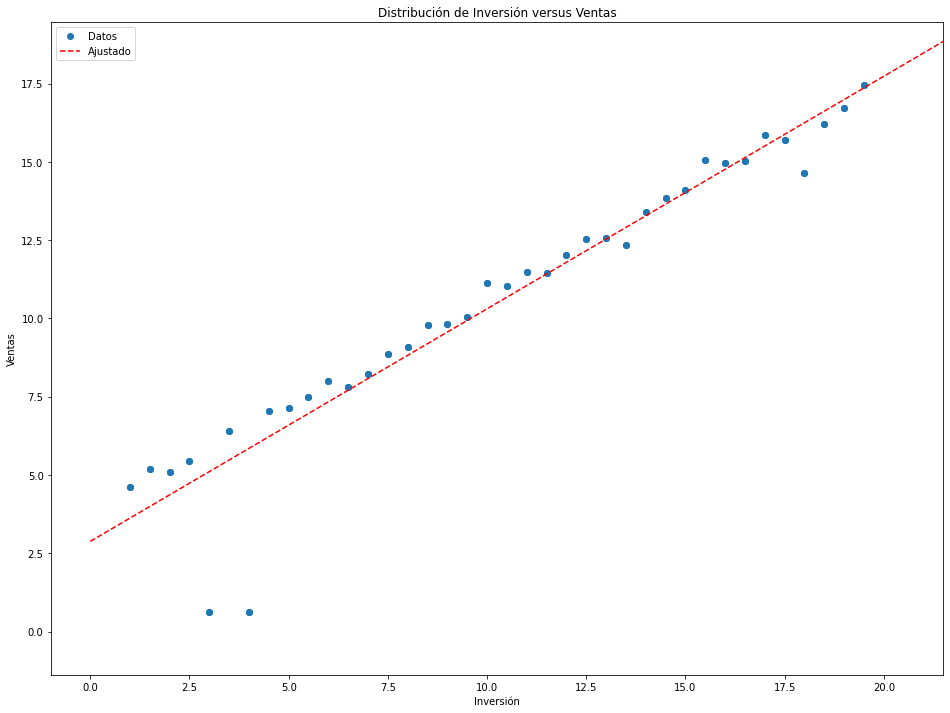

In [50]:
from scipy import stats as ss

#linregress es el metodo para extraer la recta

#pendiente, coeficiente, pearson, p, error
slope, intercept, r, p, se = ss.linregress(df["Inversion"],df["Ventas"])

def Prediccion_ventas(x):
    return intercept + slope*x

recta = np.vectorize(Prediccion_ventas)
linea = Prediccion_ventas(np.arange(3000))

# labels
fig, ax = plt.subplots(figsize=(16,12)) 
plt.title("Distribución de Inversión versus Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(df["Inversion"].min() - 2 , df["Inversion"].max() + 2 )
plt.ylim(df["Ventas"].min() - 2 , df["Ventas"].max() + 2 )

# Nube de puntos + recta de regresión
plt.scatter(df["Inversion"],df["Ventas"])
colores= ['blue', 'red']
ax.plot(df["Inversion"], df["Ventas"], 'o' , label='Datos' )
ax.plot(linea , 'r--', color='red', label="Ajustado")
legend = ax.legend(loc="best") 


In [51]:
print(f"Pendiente: {slope}\nCoeficiente: {intercept}\nCoeficiente Pearson: {r}\nP-Values: {p}\nError: {se}")

Pendiente: 0.7426698763540868
Coeficiente: 2.8805285042127142
Coeficiente Pearson: 0.9562823420491505
P-Values: 8.25497955552195e-21
Error: 0.0378532029452961


Los principales elementos que hay que interpretar en un modelo de regresión lineal son los coeficientes de los predictores. Recordemos que la ecuación de un modelo de regresión lineal es:

$$ \bbox[5px,border: 2px solid blue]{ 
  y =\beta_{0} + \beta_{j}x + e }  $$ 

donde:

y = variable dependiente o endógena

x = variable independiente o explicativa

𝛽0, 𝛽𝑗 = parámetros fijos y desconocidos

e = termino de error que recoge todos los demás factores que afectan a Y, pero que no están incluidos en el modelo. También puede captar los errores de estimación de la variable dependiente. No observable.

Ahora en nuestro análisis:

𝛽0  Este parametro no afecta en nada la relación entre Ventas e Inversión. Por lo que sólo se trata de una normalización en la que se supone que el valor promedio del error será cero. En este caso es de 2.8805. 


𝛽𝑗  Este valor debería reflejar cuál es el impacto de un cambio de Inversión sobre la variable Ventas, cuando el resto de las variables explicativas se mantienen constantes. Para este caso, el valor es de 0.74267.



Ahora utilizando la función generada Prediccion_ventas(), haremos una predicción de ventas si la inversión es de 7 millones de euros:

In [52]:
print("La prediccion de Ventas para 7 millones de euros en inversión es de: ", round(Prediccion_ventas(7),3) , "millones de euros")

La prediccion de Ventas para 7 millones de euros en inversión es de:  8.079 millones de euros


Se calculará en forma matemática el SCE:

In [53]:
sce = sum((df["Ventas"] - df["Inversion"].map(Prediccion_ventas))**2)

In [54]:
print("El valor SCE es: ",sce)

El valor SCE es:  58.927288456067366


Se realiza su análisis en la siguiente sección.

# Ajuste del modelo utilizando Libreria Statsmodels

La implementación de regresión lineal de Statsmodels, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. 

In [55]:
from patsy import dmatrices
y, X = dmatrices('Ventas ~ Inversion', data=df, return_type='dataframe')

In [56]:
modelo = sm.OLS(y, X)    # Describe el modelo
resultado = modelo.fit()       # Ajusta el modelo
print(resultado.summary())   # Resume el modelo

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        20:22:48   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8805      0.440      6.546      0.0

Utilizando statsmodels obtenemos los mismos coeficientes de los predecesores, ya analizados en la sección anterior:

In [57]:
resultado.params

Intercept    2.880529
Inversion    0.742670
dtype: float64

El Coeficiente de Determinación es una medida de la capacidad que la ecuación de regresión tiene para ajustarse a los datos, es decir, para obtener predicciones buenas (en el sentido de que sean lo menos erróneas posible). Como en este caso, el resultado es 0.91447 implica que es un buen ajuste, ya que cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar.

In [58]:
resultado.rsquared

0.9144759177150087

El coeficiente de determinación ajustado o corregido es una medida que define el porcentaje explicado por la varianza de la regresión en relación con la varianza de la variable explicada. Es decir, lo mismo que el  R2 , pero con la diferencia de que el coeficiente de determinación ajustado penaliza la inclusión de variables. En este caso, el valor es de 0.9121 que es muy similar al no ajustado, y que reafirma que es un muy buen ajuste.

In [59]:
resultado.rsquared_adj

0.9121002487626478

Las observaciones que pasan por la recta, cuya distancia es cero, son un ajuste perfecto. Obviamente, no todas las observaciones presentan un *ajuste perfecto* y se trata de que la distancia entre lo predicho y lo real sea lo menor posible. Se expresa como **SCE** (_S_uma _C_uadrado de los _E_rrores) o como $S(\beta_{0},\beta_{1})$. En palabras más simples, la suma de cuadrados de los errores (SCE) representa con una cifra lo que un modelo no es capaz de explicar.


Para este caso, el calculo de la Suma de los Cuadrados de los errores es de 58.9272, un valor que no podemos interpretar ya que este se utiliza para comparar modelos y en este caso solo tenemos uno, en el caso de haber tenido dos o más modelos el menor SCE nos indicaría que modelo podemos elegir. 

Utilizando la libreria statsmodels utilizaremos la funcion ssr.

In [60]:
resultado.ssr

58.927288456067394

Ahora utilizando el modelo lineal generado y considerando que tenemos 7 millones de euros de inversión y queremos predecir el total de ventas, se debe seguir la siguiente ecuación:

In [61]:
Ventas = resultado.params["Intercept"] + resultado.params["Inversion"]*7

In [62]:
print("Resultado del predictor de Ventas con una inversion de 7 millones de euros es: ", round(Ventas,4))

Resultado del predictor de Ventas con una inversion de 7 millones de euros es:  8.0792


# **Conclusiones finales**

La columna (coef) de la OLS Regression Results devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( 𝛽̂ 0 = 2.880529  y  𝛽̂ 1 = 0.742670 ) que equivalen a la ordenada en el origen (intercept) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo.

El valor de R-squared indica que el modelo es capaz de explicar el 91.4% de la variabilidad observada en la variable respuesta (ventas), un valor muy similar si lo comparados con el valor de R-squared ajustado de 91.2%. 


El modelo de regresión lineal generado sigue la siguiente ecuación:

> ventas = 2.880529 + 0.742670 * inversion


Por cada euro que se incrementa en el número de inversion, las ventas aumentan en promedio 0.742670 euros.


# Bibliografía y fuentes:


- Fundamentos de Estadística: https://colab.research.google.com/drive/1X2NBhth2OLAjz5xDAy6zZNkP9KQj-c28?authuser=1#scrollTo=WV7hPh723_HU

- Regresión lineal con Python: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

- https://docs.scipy.org/